### EDA on Tesla Stock Data Analysis

Exploratory Data Analysis or EDA , is an important step to be performed in Data Science projects. EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

**Year Information**: 2010 - 2020

**Month Information**: All 12 months (January, February, March, April, May, June, July, August, September, October, November, and December)

**Day Information**: Only 5 working days (Monday, Tuesday, Wednesday, Thursday and Friday)

### Step1. Importing the libraries
We always intialize by importing the important libraries needed for performing EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt0
from pandas.plotting import table

import warnings
warnings.filterwarnings('ignore')

### Step2. Creating & Reading the data

In [2]:
# Load the dataset
Data = pd.read_csv("TSLA.csv")

In [3]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


### Set3-print datatypes, dimension and descriptive statistics.

In [4]:
Data.shape

(2416, 7)

In [5]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
# Convert the Date column to DateTime object
Data['Date'] = pd.to_datetime(Data['Date'])

In [7]:
Data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# Disable the scientific notation to understand figures better
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,576.81,558.08,566.90,566.90,11788500
2412,2020-01-29,575.69,589.80,567.43,580.99,580.99,17801500
2413,2020-01-30,632.42,650.88,618.00,640.81,640.81,29005700
2414,2020-01-31,640.00,653.00,632.52,650.57,650.57,15719300


We assign the value 'all' in the include attribute to make sure that categorical features are also in the result

For numerical parameters- fields like mean, standard deviation, percentiles, and maximum have been populated. For categorical features- count, unique, top (most frequent value), and corresponding frequency have been populated. This gives us a broad idea of the dataset.

In [10]:
Data.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2010-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


### Step4. Check if there are missing values. If yes, handle them.
To check if there are missing values present in the dataset. If there are missing values we will impute them with appropriate values Mode in case of categorical feature, and Median or Mean in case of numerical feature).

In [11]:

Data.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
#To check if there are any special characters in place of values
for i in Data.columns:
    print({i:Data[i].unique()})
    


{'Date': array(['2010-06-29T00:00:00.000000000', '2010-06-30T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', ...,
       '2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-03T00:00:00.000000000'], dtype='datetime64[ns]')}
{'Open': array([ 19.      ,  25.790001,  25.      , ..., 632.419983, 640.      ,
       673.690002])}
{'High': array([ 25.      ,  30.42    ,  25.92    , ..., 650.880005, 653.      ,
       786.140015])}
{'Low': array([ 17.540001,  23.299999,  20.27    , ..., 618.      , 632.52002 ,
       673.52002 ])}
{'Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Adj Close': array([ 23.889999,  23.83    ,  21.959999, ..., 640.809998, 650.570007,
       780.      ])}
{'Volume': array([18766300, 17187100,  8218800, ..., 29005700, 15719300, 47065000],
      dtype=int64)}


From the above observations we can observe that there are no missing values or unique value in the data. So,we won't eliminate or treat any missing values

### Step5. To visualize the given data into graphical format

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

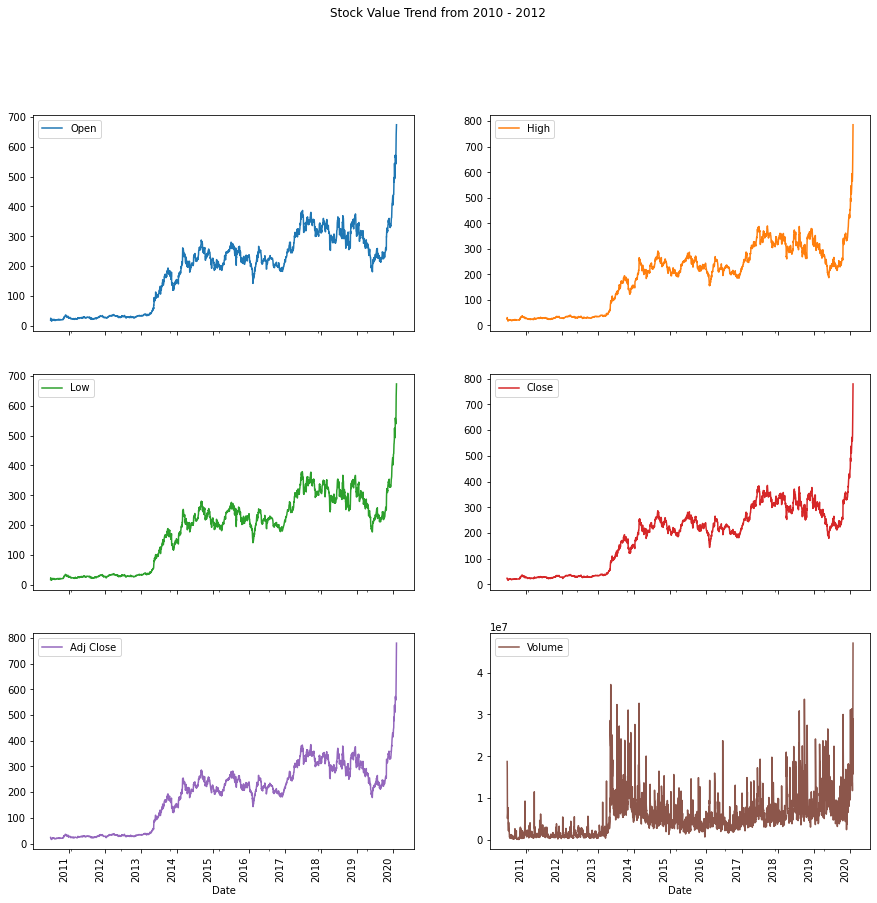

In [13]:
# Creating a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


Data.plot(x = "Date", y = Column_List, subplots = True,layout=(3,2), 
          figsize = (15, 15),
          title = "Stock Value Trend from 2010 - 2020", rot = 90)

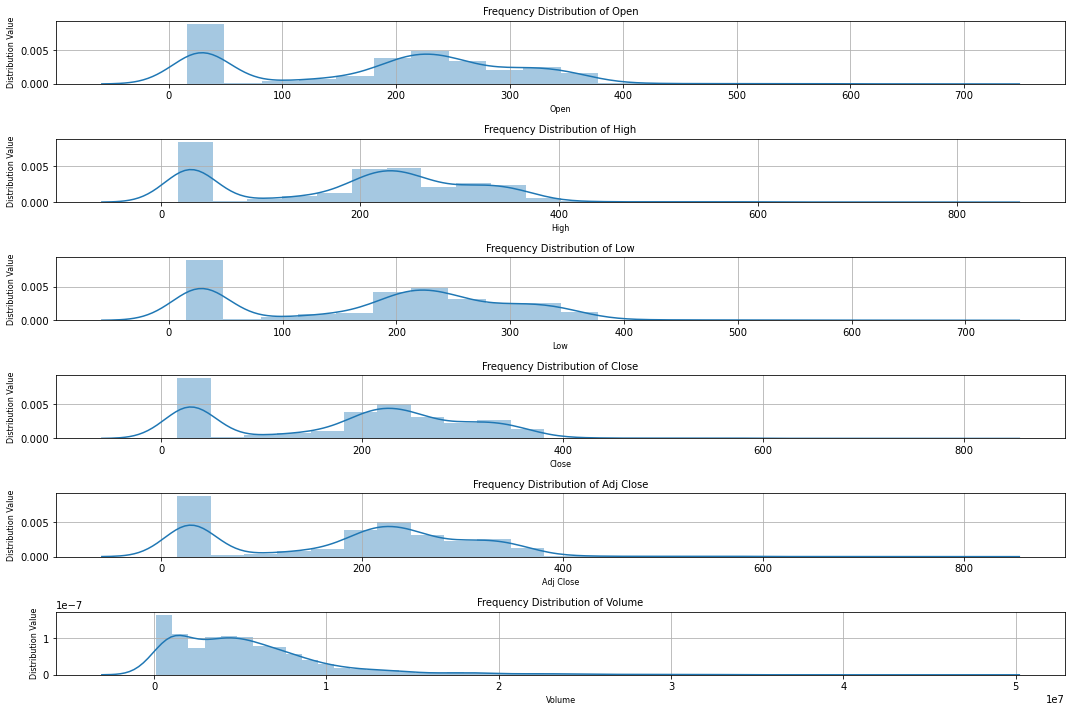

In [31]:
# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(Data[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, 
                     fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) 
    # This will help to provide spaces btw the plots
    ax[i].grid('on') # use to enable the grid lines in the plots.

1. If the values are perfectly distributed than a bell shaped normalized curve will be formed
2. If the values are showing skewness towards the left or right then the data consists of ouliers

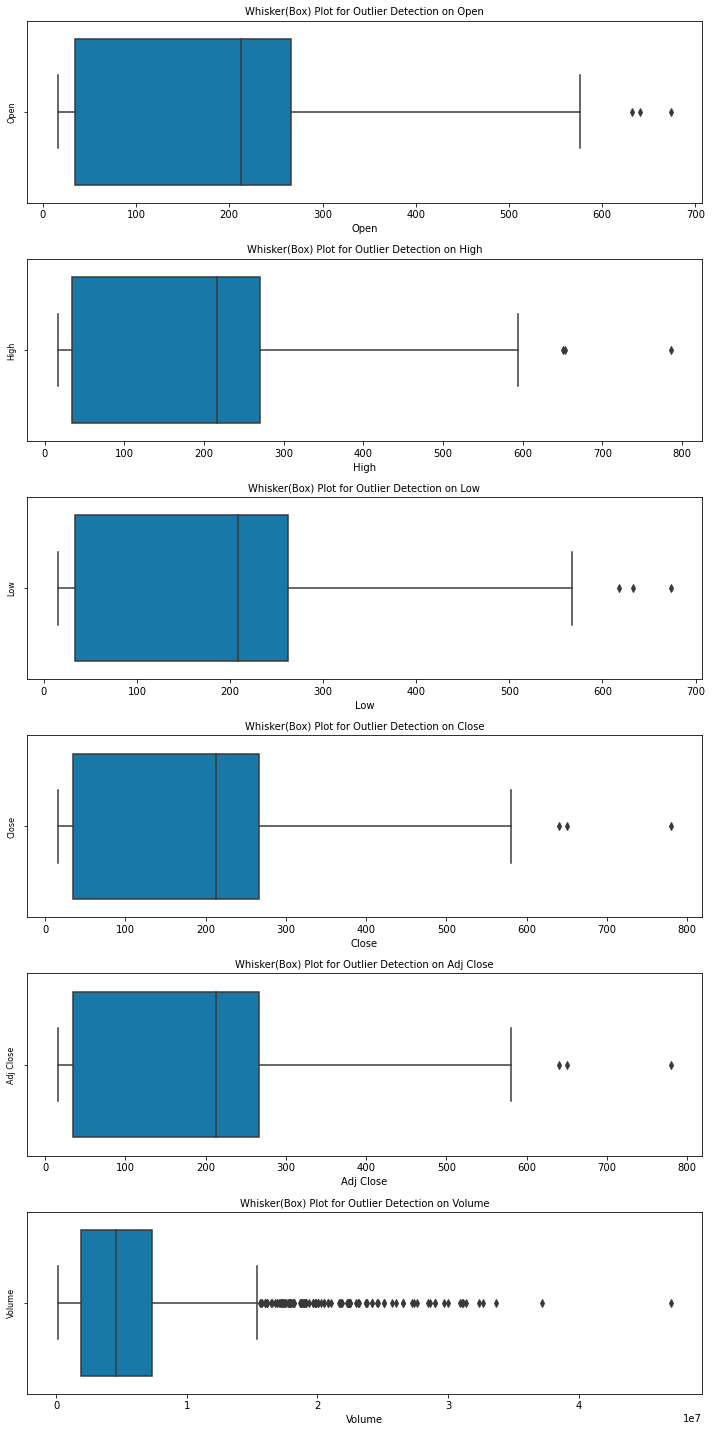

In [15]:
# Generating whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(Data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker(Box) Plot for Outlier Detection on" + " " + 
                    col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

Ouliers are the anomalies present in the data i.e. value which is far away from the clustered values.
The middle portion represents the inter-quartile range (IQR). The horizontal line in the middle represents the median of the data. The hollow circles near the tails represent outliers in the data. Outliers should be removed/treated or used in the data will be dependent on the logical validity of the values.

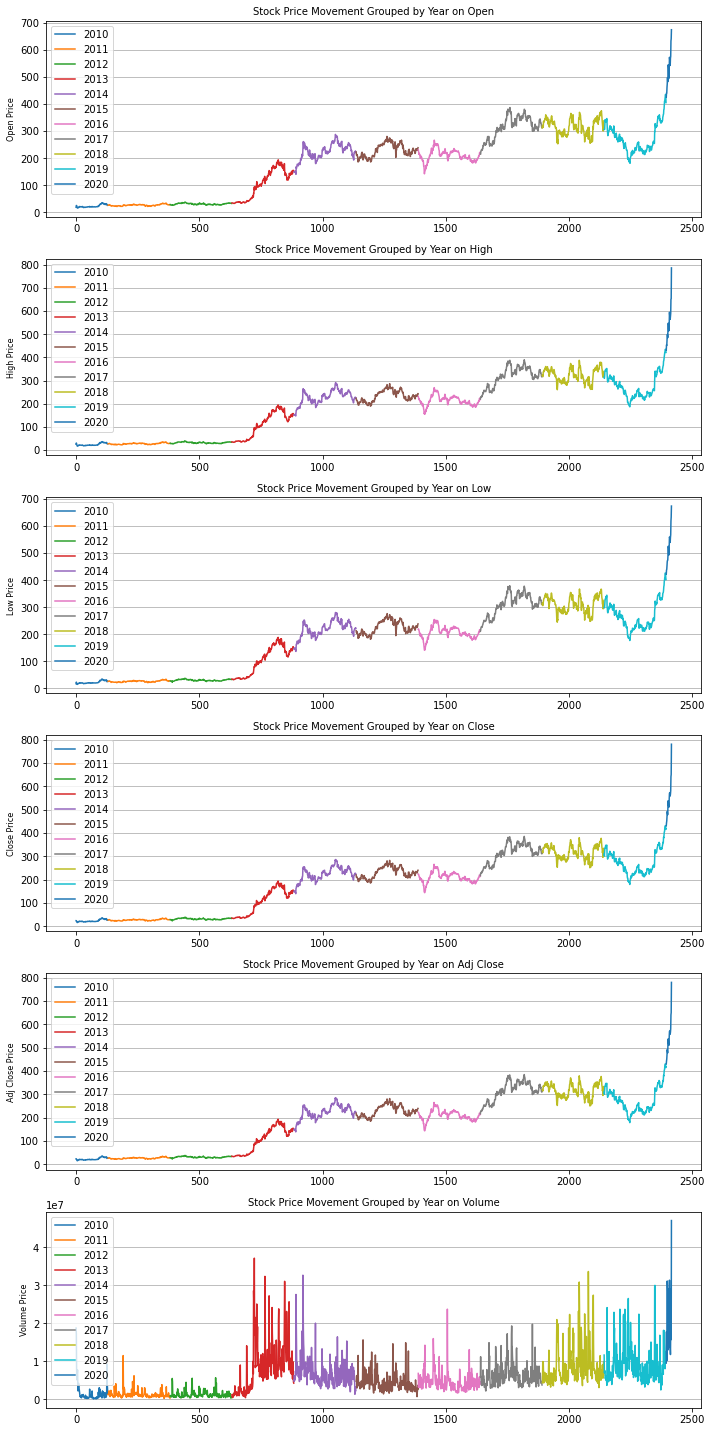

In [16]:
# Since the data is a time series data, we should be able to predict the 
#future through forecasting techniques

# Decomposing the time series year-wise and month-wise to analyse it further
Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday

# Firstly plotting the data year-wise to see the duration of when it 
#hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Grouped the data by year & its plot
for i, col_list in enumerate(Column_List):
    Data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + 
                    " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # enabling grid lines on Y axis.


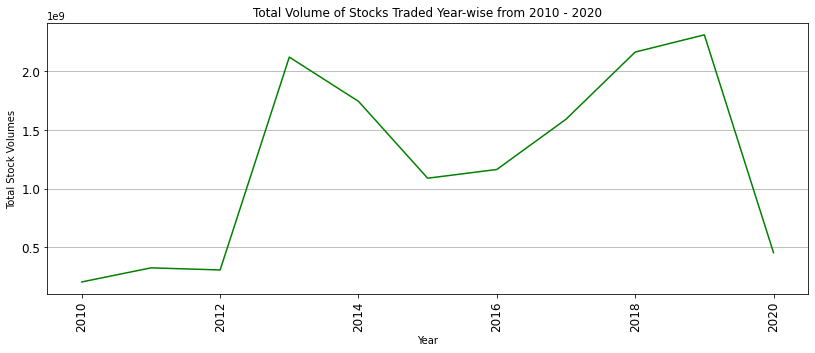

In [29]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = Data.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, 
           title = "Total Volume of Stocks Traded Year-wise from 2010 - 2020", 
           rot = 90, color = "green")

ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)


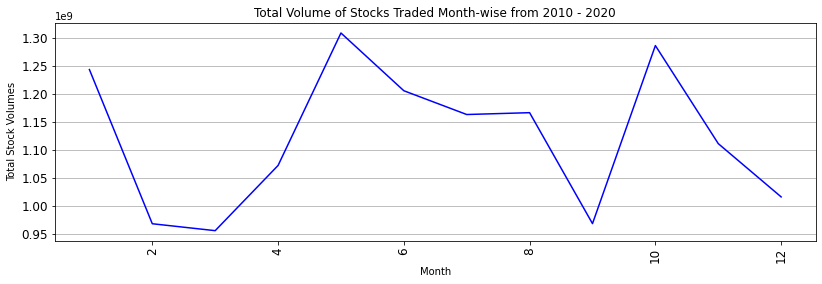

In [18]:
# Visualzing only the total volume of stocks traded grouped month-wise
check = Data.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, 
           title = "Total Volume of Stocks Traded Month-wise from 2010 - 2020", 
           rot = 90, color = "blue")

ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

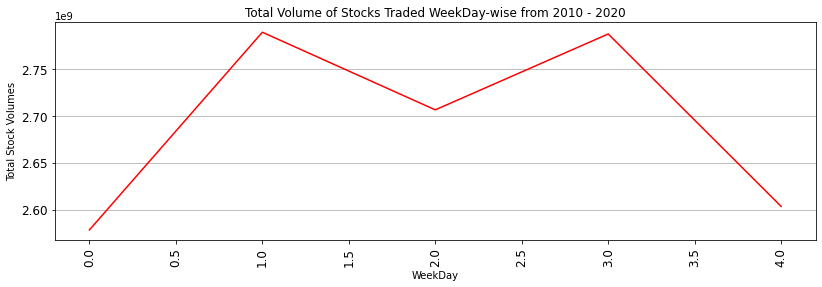

In [19]:
# Visualzing only the total volume of stocks traded grouped weekday-wise
check = Data.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12,
           title = "Total Volume of Stocks Traded WeekDay-wise from 2010 - 2020", rot = 90, color = "red")

ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

In [20]:
# Analysing it based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Year')[col_list].sum()
    
# Converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [21]:
var

,Volume
Year,
2010,205369100
2011,325235100
2012,307449000
2013,2118745900
2014,1742321300
2015,1088217800
2016,1162361700
2017,1590031400
2018,2161638800


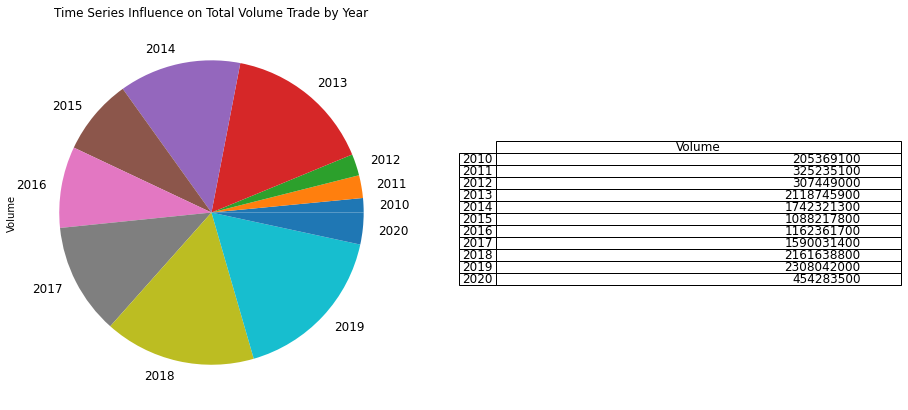

In [22]:
# Plotting to understand the trend using pie charts
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12,
         title = "Time Series Influence on Total Volume Trade by Year", 
         ax = ax1)

# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.set_fontsize(12)
plt.show()

In [23]:
# Analysing it based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('Month')[col_list].sum()
    
# Converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [24]:
var

,Volume
Month,
1,1243700900
2,967475600
3,955076800
4,1071875300
5,1309223600
6,1205766600
7,1163162500
8,1166461300
9,967704800


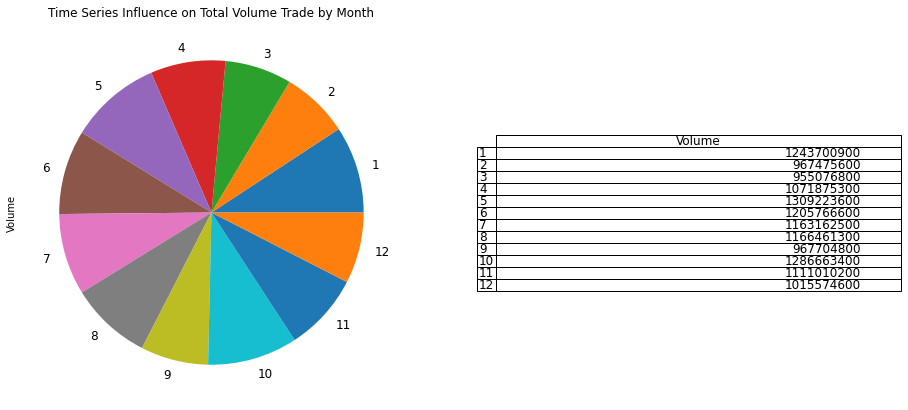

In [25]:
# Plotting to understand the trend using pie charts
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12,
         title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var,loc='center')

tbl.set_fontsize(12)
plt.show()

In [26]:
# Analysing it based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('WeekDay')[col_list].sum()
    
# Converting the variable into a pandas dataframe
var = pd.DataFrame(var)

In [27]:
var

,Volume
WeekDay,
0,2578390800
1,2788784800
2,2706179000
3,2786937200
4,2603403800


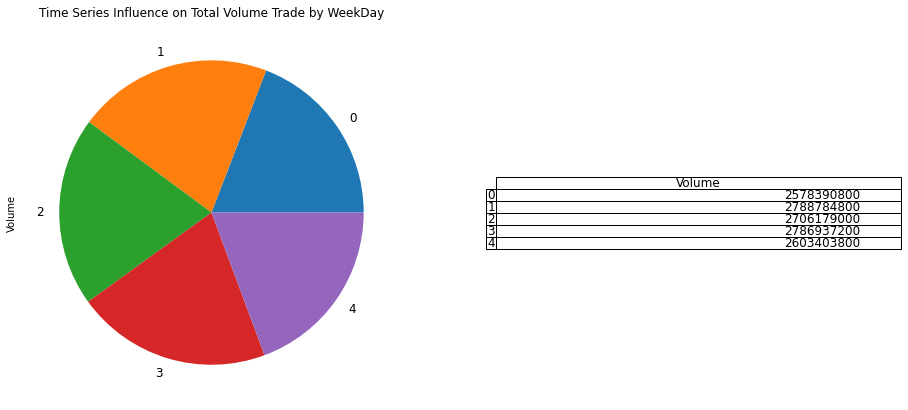

In [28]:
# Plotting to understand the trend using pie charts
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12,
         title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')

tbl.set_fontsize(12)
plt.show()